In [4]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

Create grid

In [5]:
m = 6
n = 6

i = np.arange(0,m+1)
j = np.arange(0,n+1)


x = []
y = []
for d in i:
    xi = 0.5* np.cos(np.pi/m * i[d])
    yi = 0.5 *np.cos(np.pi/n * j[d])
    x.append(xi)
    y.append(yi)    
    
x = np.asarray(x)   
y = np.asarray(y)  

Plot grid

<IPython.core.display.Javascript object>


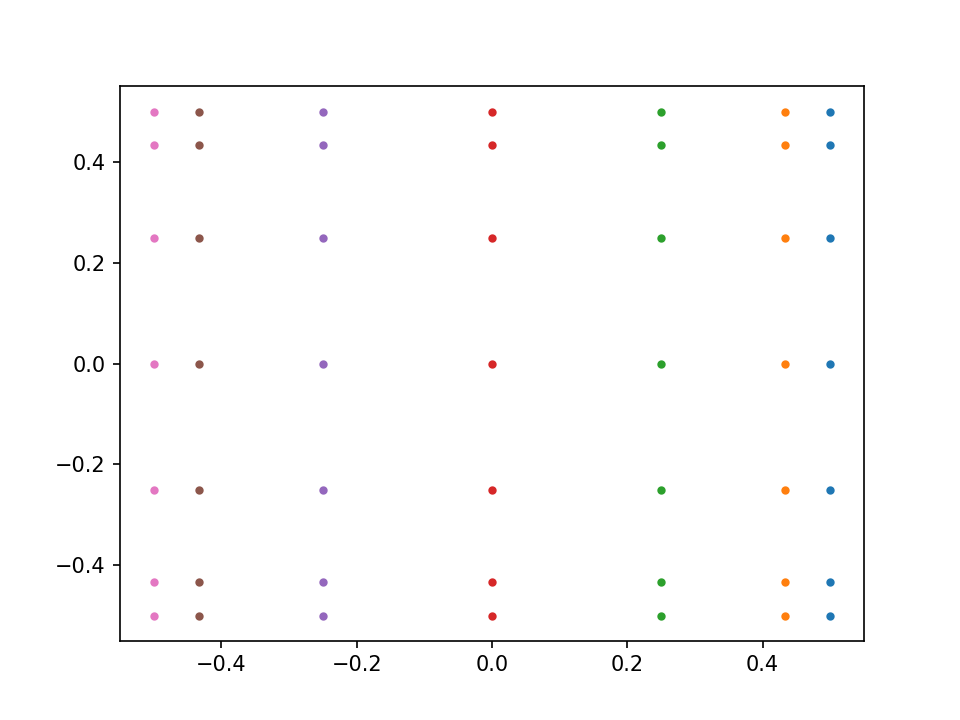

In [6]:
#len(x)
#len(y)

xx,yy = np.meshgrid(x, y)
plt.plot(xx,yy, marker='.', linestyle='none')

Create D matrix

In [7]:
def Dmatrix():
    ci = np.ones(m+1)
    ci[0] = ci[-1] = 2
    
    cj = np.ones(n+1)
    cj[0] = cj[-1] = 2
    
    cj = np.asarray(cj)
    ci = np.asarray(ci)
    
    D = np.zeros((m+1,n+1))
    D = np.asmatrix(D)
    D[0,0] =  (2 * n**2 + 1)/6
    D[n,n] =  (2 * n**2 + 1)/6

    for d in i:
        for e in j:
            if d != e:
                D[d,e] = (ci[d]*(-1)**(d+e))/(cj[e]*(x[d] - x[e]))
            
    diag = np.sum(D[1:-1],axis = 1)
    D[1:-1, 1:-1] = D[1:-1, 1:-1] - np.diagflat(diag)
    
    D1 = D
    return D1

In [8]:
D = Dmatrix()

In [9]:
np.shape(D)
D

matrix([[  1.21666667e+01,  -2.98564065e+01,   8.00000000e+00,
          -4.00000000e+00,   2.66666667e+00,  -2.14359354e+00,
           1.00000000e+00],
        [  7.46410162e+00,  -3.46410162e+00,  -5.46410162e+00,
           2.30940108e+00,  -1.46410162e+00,   1.15470054e+00,
          -5.35898385e-01],
        [ -2.00000000e+00,   5.46410162e+00,  -6.66666667e-01,
          -4.00000000e+00,   2.00000000e+00,  -1.46410162e+00,
           6.66666667e-01],
        [  1.00000000e+00,  -2.30940108e+00,   4.00000000e+00,
           1.33226763e-15,  -4.00000000e+00,   2.30940108e+00,
          -1.00000000e+00],
        [ -6.66666667e-01,   1.46410162e+00,  -2.00000000e+00,
           4.00000000e+00,   6.66666667e-01,  -5.46410162e+00,
           2.00000000e+00],
        [  5.35898385e-01,  -1.15470054e+00,   1.46410162e+00,
          -2.30940108e+00,   5.46410162e+00,   3.46410162e+00,
          -7.46410162e+00],
        [ -1.00000000e+00,   2.14359354e+00,  -2.66666667e+00,
           4.

Create $T_0, U_0, V_0$.

In [14]:
def T_0(top = 0 , bot = 0):
    T0 = np.zeros((m+1,n+1))
    T0 = np.asmatrix(T0)
    T0[0,:] =  top
    T0[-1,:] = bot
    return T0

def U_0(top = 0 , bot = 0):
    U0 = np.zeros((m+1,n+1))
    U0 = np.asmatrix(U0)
    U0[0,:] =  top
    U0[-1,:] = bot
    return U0

def V_0(top = 0 , bot = 0):
    V0 = np.zeros((m+1,n+1))
    V0 = np.asmatrix(V0)
    V0[0,:] =  top
    V0[-1,:] = bot
    return V0

Call $U_0$.

In [15]:
re = 2750
Un = U_0( top = re)

np.shape(Un)
Un

matrix([[ 2750.,  2750.,  2750.,  2750.,  2750.,  2750.,  2750.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.]])

Call $V_0$.

In [16]:
Vn = V_0()

np.shape(Vn)
Vn

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Call $T_0$.

In [17]:
a = 0.5
Tn = T_0(top = a, bot = -a)

np.shape(Tn)
Tn


matrix([[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5]])

Solve $T_n \rightarrow T_{n+}1$.

Temporal scheme:
$$\frac{3T^{n+1} - 4T^n + T^{n-1}}{2h} = -2NL(u^n, T^n) + NL(u^{n-1},T^{n-1}) + \frac{1}{Pr}\Delta T^{n+1}$$
Multiply by $Pr$ and reorder so that $T^{n+1}$ terms are on the left hand side:
$$(\Delta - \frac{3T^{n+1}}{2h}) T^{n+1} = Pr[2NL(u^n, T^n) - NL(u^{n-1},T^{n-1}) -  \frac{4T^n + T^{n-1}}{2h}] $$

Nonlienar terms can be computed as followed:
$$NL = u \frac{\partial }{\partial x} + v\frac{\partial }{\partial y} = asp * U * DX + 2V * DY^T$$

Therefore, $NL(u, T)$ is:
$$NL(u, T) = u \frac{\partial T}{\partial x} + v\frac{\partial T}{\partial y} =2 * U * DXT + 2V * TDY^T = 2U (DT) + 2V(TD^T)$$

In [86]:
## NLT

asp = 2

NLT = asp*Un * (D*Tn) + asp*Vn * (Tn*np.transpose(D))


np.shape(Un), np.shape(D), np.shape(Vn), np.shape(D), np.shape(NLT)

((7, 7), (7, 7), (7, 7), (7, 7), (7, 7))

All partial derivatives are evaluatled directly by the Chebyshev differentiation matrix. Since the computational domain is $[-1/2,1/2]^2$, the chain rule must be applied to partial derivatives using the Chebyshev differentiation matrix D,
$$\frac{\partial u}{\partial x} = 2Du, \frac{\partial u}{\partial y} = 2uD^T$$
$$\frac{\partial^2 u}{\partial^2 x} = 4D^2u, \frac{\partial^2 u}{\partial^2 y} = 4u(D^2)^T$$

From substitution, the left side of the reordered temportal scheme is
$$LHS = (\Delta - \frac{3T^{n+1}}{2h}) T^{n+1} = \frac{\partial^2  T^{n+1}}{\partial^2 x} + \frac{\partial^2  T^{n+1}}{\partial^2 y}- \frac{3T^{n+1}}{2h} $$
$LHS$= asp^2 D^2  T^{n+1} + asp^2  T^{n+1} (D^2)^T - \frac{3T^{n+1}}{2h} $$


The Temporal scheme is now in the form of Helmholtz:
$$H = AT^{n+1} + T^{n+1} B + \sigma T^{n+1}$$

According to the boundary conditions:
$$\frac{\partial T_{0,0:m}}{\partial x} = aspD_{0k}T^{n+1}_{kj} =  0.0$$
$$\frac{\partial T_{m,0:m}}{\partial X}  = aspD_{0k}T^{n+1}_{kj} = 0.0$$
$$\frac{\partial T_{0:m,0}}{\partial y} = aspT^{n+1}_{mk}D_{k0}^T = 0.5$$
$$\frac{\partial T_{0:m,m}}{\partial y} = aspT^{n+1}_{mk}D_{kj}^T = -0.5$$

Since $T_{0,0:m} = 0$ and $T_{m,0:m} = 0$,
$$\frac{\partial T_{0,j=0:m}}{\partial x} = asp \sum_{k = 0}^{m} D_{0k}T^{n+1}_{kj} = asp\sum_{k = 1}^{m-1}D_{0k}T^{n+1}_{k0} +  aspD_{00}T^{n+1}_{0j} + aspD_{0m}T^{n+1}_{mj} =  0.0$$
$$\frac{\partial T_{m,j=0:m}}{\partial x} = asp \sum_{k = 0}^{m} D_{mk}T^{n+1}_{kj} = asp\sum_{k = 1}^{m-1}D_{mk}T^{n+1}_{k0} +  aspD_{m0}T^{n+1}_{0j} + aspD_{mm}T^{n+1}_{mj} =  0.0$$

Therefore, 
$$\frac{\partial^2  T_{ij}^{n+1}}{\partial^2 x} = asp^2 \sum_{k = 0}^{m}  D_{ik}^2  T_{kj}^{n+1} = asp^2\sum_{k = 1}^{m-1} D_{ik}^2  T_{kj}^{n+1} + asp^2 D_{i0}^2  T_{0j}^{n+1} + asp^2 D_{im}^2  T_{mj}^{n+1} $$
$$\frac{\partial^2  T_{ij}^{n+1}}{\partial^2 y} = asp^2 \sum_{k = 0}^{m} T_{ik}^{n+1} (D_{kj}^2)^T  = asp^2 \sum_{k= 1}^{m-1} T_{ik}^{n+1} (D_{kj}^2)^T  + asp^2  T_{i0}^{n+1} (D_{0j}^2)^T  + asp^2  T_{im}^{n+1} (D_{mj}^2)^T $$

Using substitution, the left side of the reordered temportal scheme is

$$LHS = asp^2[\sum_{k = 1}^{m-1} D_{ik}^2  T_{kj}^{n+1} + D_{i0}^2  T_{0j}^{n+1} + D_{im}^2  T_{mj}^{n+1}+ \sum_{k= 1}^{m-1} T_{ik}^{n+1} (D_{kj}^2)^T  + T_{i0}^{n+1} (D_{0j}^2)^T  + T_{im}^{n+1} (D_{mj}^2)^T] - \frac{3T^{n+1}}{2h}$$

$$LHS - asp^2 (T_{i0}^{n+1} (D_{0j}^2)^T  + T_{im}^{n+1} (D_{mj}^2)^T) = asp^2[\sum_{k = 1}^{m-1} D_{ik}^2  T_{kj}^{n+1} + D_{i0}^2  T_{0j}^{n+1} + D_{im}^2  T_{mj}^{n+1}+ \sum_{k= 1}^{m-1} T_{ik}^{n+1} (D_{kj}^2)^T] - \frac{3T^{n+1}}{2h}$$

The Chebyshev differentiation matrix $D$ never changes, so we want to find $T_{0j}^{n+1},  T_{mj}^{n+1}$ in terms of $ T_{kj}^{n+1}.$



$$T_{0j}^{n+1} = - \sum^{m-1}_{k=0} \frac{D_{mm}D_{0k} - D_{0m}D_{mk}}{D_{00}D_{mm} - D_{m0}D_{0m}}T_{kj}^{n+1} $$


$$T_{mj}^{n+1} = - \sum^{m-1}_{k=0} \frac{D_{m0}D_{0k} - D_{00}D_{mk}}{D_{m0}D_{0m} - D_{00}D_{mm}}T_{kj}^{n+1} $$


Using substitution, the left side of the reordered temportal scheme is
$$LHS - asp^2 (T_{i0}^{n+1} (D_{0j}^2)^T  + T_{im}^{n+1} (D_{mj}^2)^T) = asp^2[\sum_{k = 1}^{m-1} D_{ik}^2  T_{kj}^{n+1} - D_{i0}^2 \sum^{m-1}_{k=0} \frac{D_{mm}D_{0k} - D_{0m}D_{mk}}{D_{00}D_{mm} - D_{m0}D_{0m}}T_{kj}^{n+1}  - D_{im}^2   \sum^{m-1}_{k=0} \frac{D_{m0}D_{0k} - D_{00}D_{mk}}{D_{m0}D_{0m} - D_{00}D_{mm}}T_{kj}^{n+1}+ \sum_{k= 1}^{m-1} T_{ik}^{n+1} (D_{kj}^2)^T] - \frac{3T^{n+1}}{2h}$$



(matrix([[  22.33333333,  -21.4853948 ,   25.33333333,  -32.66666667,
            33.33333333,  528.15206147,  -98.75      ]]),
 matrix([[ -98.75      , -198.35382907,  228.        , -130.        ,
            90.22222222,  -73.64617093,   71.        ]]))

In [89]:
## D2 and boundaries
D2 = D*D

D200 = D2[0,:]
D20m = D2[-1,:]

D2m0 = D2[:,0]
D2mm = D2[:,-1]
D200, D20m, D2m0, D2mm

D2ij = D2[1:-1,1:-1]

## D and boundaries
D00 = D[0,0]
D0m = D[0,-1]
Dm0 = D[-1,0]
Dmm = D[-1,-1]
D00, D0m, Dm0, Dmm

Dmk = D[-1,1:-1]
D0k = D[0,1:-1]
Dim = D[1:-1,-1]S
Di0 = D[1:-1,0]


## T and boundaries
T0j = Tn[0,:]
Tmj = Tn[-1,:]
T0j, Tmj


(matrix([[ -98.75      , -198.35382907,  228.        , -130.        ,
            90.22222222,  -73.64617093,   71.        ]]),
 matrix([[  22.33333333,  -21.4853948 ,   25.33333333,  -32.66666667,
            33.33333333,  528.15206147,  -98.75      ]]),
 matrix([[-98.75      ],
         [ 80.32520245],
         [ 11.        ],
         [ -8.16666667],
         [  5.44444444],
         [ -1.65853578],
         [ 22.33333333]]),
 matrix([[  71.        ],
         [ -14.69872981],
         [  21.66666667],
         [ -32.5       ],
         [  59.66666667],
         [-101.30127019],
         [ -98.75      ]]))

The time integration used is second order accurate and is based on a combination of Adams-Bashforth and backward differentiation formula (AB2/BDF) schemes.
\begin{align}
T_{n+1} = T_n + \frac{h}{2}[3 f(T_n, t_n) - f(T_{n-1}, t_{n-1})]
\end{align}

The AB2 method requires the solution from the n-1th and the nth steps to find the solution at the n+1th step.

In [2]:
h = 0.1
tmax  = 1
Nsteps = int(tmax/h)

#def rk4(y, f, t, h):
#    """Runge-Kutta RK4"""
#    k1 = f(t, y)
#    k2 = f(t + 0.5*h, y + 0.5*h*k1)
#    k3 = f(t + 0.5*h, y + 0.5*h*k2)
#    k4 = f(t + h, y + h*k3)
#    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

#def velocity_verlet(y, f, t, h):
#    # half step velocity
#    F = f(t, y)
#    y[1] += 0.5*h * F[1]
#    # full step position
#    y[0] += h*y[1]
#    # full step velocity (updated positions!)
#    # NOTE: this force evaluation should be used for the next iteration!!!
#    F = f(t+h, y)
#    y[1] += 0.5*h * F[1]

    return y

#def f(T,t):
    

def ab2(y, f, t, h):
    for t in range(Nsteps):
        ## nth step
        k1 = f(Tn, t)
        ## n-1th step
        k0 = f(Tn_1, t)
        ## n+1 step
        Tn1 = Tn + (h/2)*((3*k1) - k0)
        
    return Tn1
    

NameError: name 'np' is not defined